# subsub
## Fixing the data and looking at it

Natalie Gosnell  
July 5, 2016

Making sure re-reduced spectra looks right and checking wave and variance info

## New data
S1063 in M67. All H-band data in "SDCH_20150425_0064.spec_a0v.fits". Variance in "SDCH_20150425_0064.variance.fits". Emailed to MGS by NG on July 5, 2016 with email subject "new reduced data".

In [9]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [10]:
sns.set_context('notebook')

In [11]:
!ls -1 ../data/raw/

S1063_o110.fits
S1063_o113.fits
S1063_o115.fits
SDCH_20150425_0064.spec_a0v.fits
SDCH_20150425_0064.variance.fits


In [12]:
hdu = fits.open("../data/raw/SDCH_20150425_0064.spec_a0v.fits")

In [14]:
var = fits.open("../data/raw/SDCH_20150425_0064.variance.fits")

In [15]:
hdu.info()

Filename: ../data/raw/SDCH_20150425_0064.spec_a0v.fits
No.    Name         Type      Cards   Dimensions   Format
0    SPEC_DIVIDE_A0V  PrimaryHDU     183   (2048, 28)   float64   
1    WAVELENGTH  ImageHDU       184   (2048, 28)   float64   
2    TGT_SPEC    ImageHDU       184   (2048, 28)   float32   
3    A0V_SPEC    ImageHDU       184   (2048, 28)   float32   
4    VEGA_SPEC   ImageHDU       184   (2048, 28)   float64   


In [16]:
var.info()

Filename: ../data/raw/SDCH_20150425_0064.variance.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     181   (2048, 28)   float32   


In [17]:
dat = hdu[0]
wav = hdu[1]

In [18]:
o110 = 12  
o113 = 15  
o115 = 17

In [19]:
dat.data[o110]

array([ nan,  nan,  nan, ...,  nan,  nan,  nan])

#### Yep, we have nans...not sure the best way to deal with this. Below is a possibility, but you might have a nicer method.

## Order 110

In [20]:
flux110 = dat.data[o110]
fluxcut110 = flux110[~np.isnan(flux110)]
fluxcut110

array([ -584440.51238106,  2408426.27221528, -2065187.58952561, ...,
         345491.46041362,   386392.03504595,   410931.53738583])

In [21]:
wave110 = wav.data[o110]
wavecut110 = wave110[~np.isnan(flux110)]
wavecut110

array([ 1.61714742,  1.61716003,  1.61717264, ...,  1.63975213,
        1.63976211,  1.63977209])

In [22]:
sigma = var[0]

In [23]:
sig110 = sigma.data[o110]
sigcut110 = sig110[~np.isnan(flux110)]
sigcut110

array([ 1592.81896973,  1824.42602539,  1722.28039551, ...,  2549.68652344,
        2501.43261719,  2494.15185547], dtype=float32)

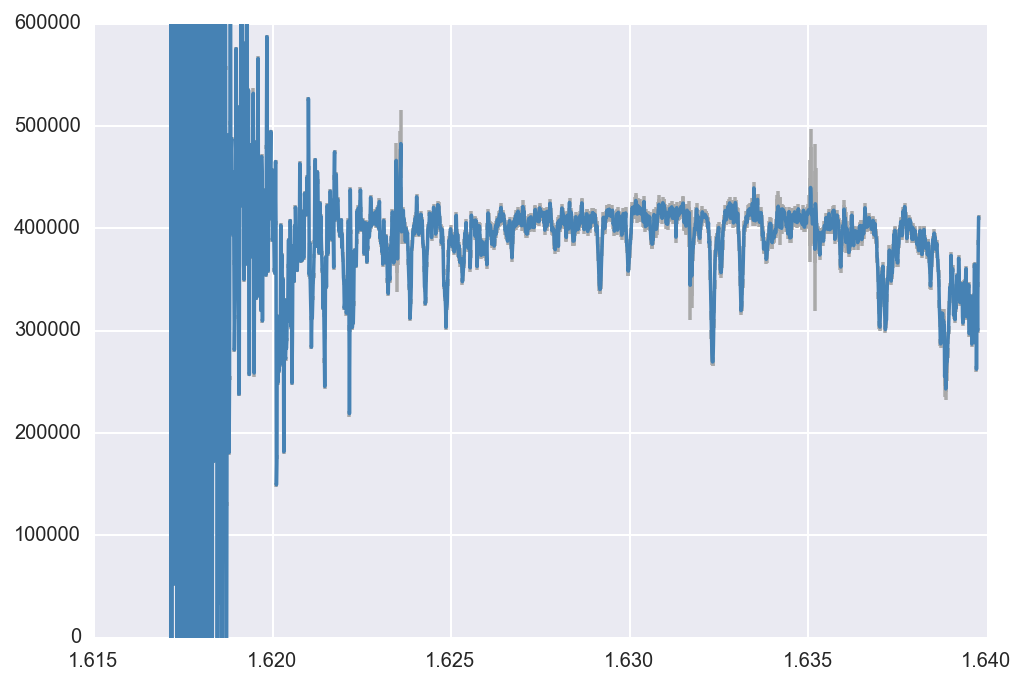

In [25]:
plt.errorbar(wavecut110,fluxcut110,yerr=sigcut110,capsize=0,color="steelblue",
             ecolor="darkgray")
plt.ylim(0,6e5)
plt.show()

#### Not sure if we care about trimming noise intelligently or we should just cut off by eye (e.g., everything short of ~1.623 in this order) ...leaving it for now

## Order 113

In [26]:
flux113 = dat.data[o113]
fluxcut113 = flux113[~np.isnan(flux113)]
wave113 = wav.data[o113]
wavecut113 = wave113[~np.isnan(flux113)]
sig113 = sigma.data[o113]
sigcut113 = sig113[~np.isnan(flux113)]

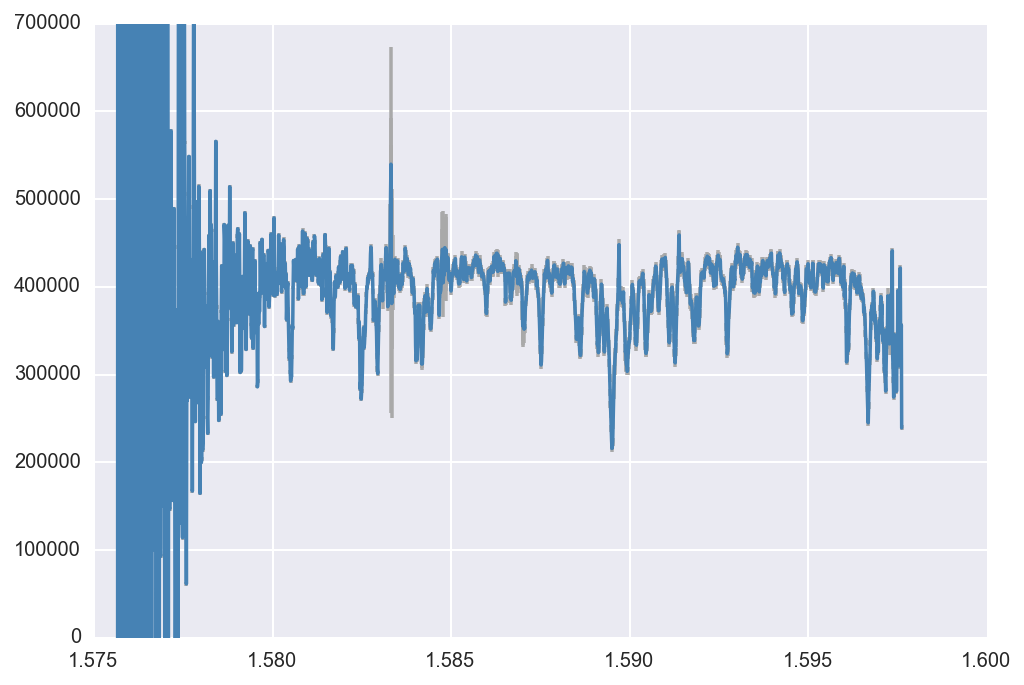

In [27]:
plt.errorbar(wavecut113,fluxcut113,yerr=sigcut113,color="steelblue",
             ecolor="darkgray")
plt.ylim(0,7e5)
plt.show()

## Order 115

In [28]:
flux115 = dat.data[o115]
fluxcut115 = flux115[~np.isnan(flux115)]
wave115 = wav.data[o115]
wavecut115 = wave115[~np.isnan(flux115)]
sig115 = sigma.data[o115]
sigcut115 = sig115[~np.isnan(flux115)]

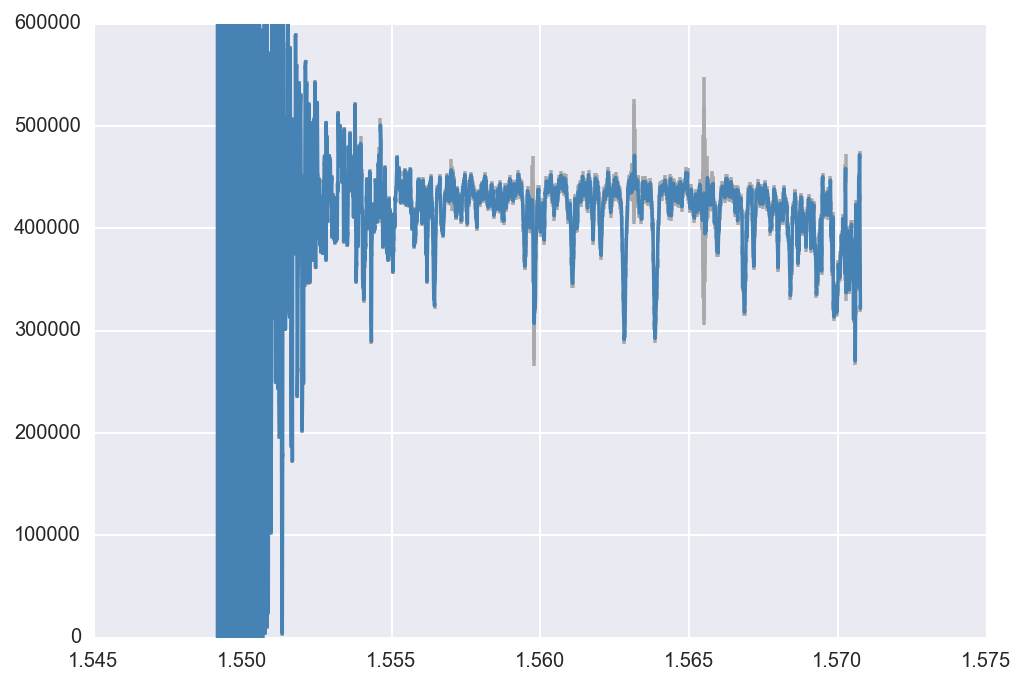

In [29]:
plt.errorbar(wavecut115,fluxcut115,yerr=sigcut115,color="steelblue",
             ecolor="darkgray")
plt.ylim(0,6e5)
plt.show()

## Still need to trim noise...